In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import matplotlib.animation as animation

Vamos a simular el comportamiento de una partícula con carga en un campo electromagnético.

Con el objetivo de simular el comportamiento de un espejo magnético.

In [50]:
# Definimos los campos
def E(x, y, z, t):
    return (0, 0, 0)

def B(x, y, z, t):
    return (0, 0, 10)

# Definimos la fuerza de Lorentz
def Lorentz(x, y, z, t, v, q, m):
    F = q * (E(x, y, z, t) + np.cross(v, B(x, y, z, t)))
    return F / m

# Definimos la ecuación diferencial
def dXdt(X, t, q, m):
    x, y, z, vx, vy, vz = X
    v = np.array([vx, vy, vz])
    a = Lorentz(x, y, z, t, v, q, m)
    return [vx, vy, vz, a[0], a[1], a[2]]

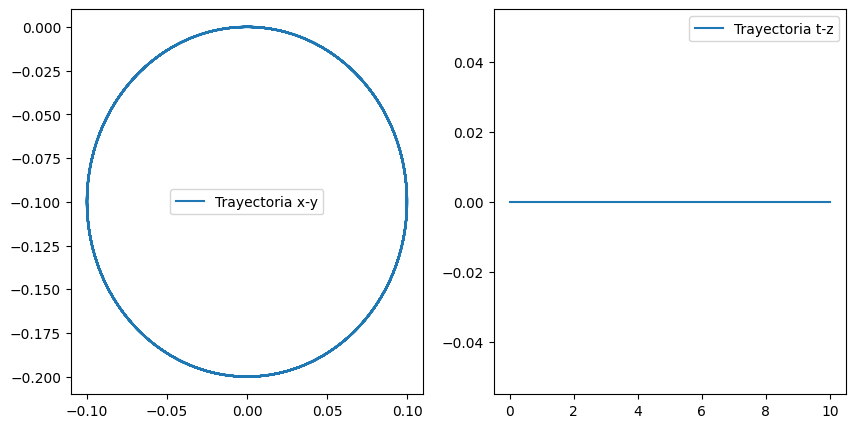

In [51]:
# Ahora vamos a resolver la ecuación diferencial usando odeint
q = 1
m = 1
X0 = [0, 0, 0, 1, 0, 0]
t = np.linspace(0, 10, 1000)

sol = odeint(dXdt, X0, t, args=(q, m))

# Ahora vamos a graficar la solución
x, y, z, vx, vy, vz = sol.T
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Trayectoria x-y')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(t, z, label='Trayectoria t-z')
plt.legend()
plt.show()

In [43]:
from IPython.display import clear_output

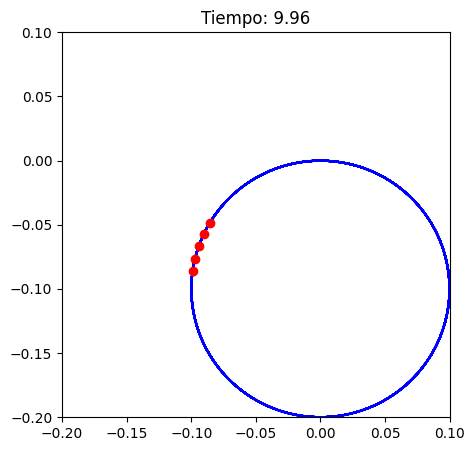

In [53]:
# Ahora vamos a hacer una animación de la partícula moviendose en el plano x-y
ims = []
fig = plt.figure(figsize=(5, 5))
plt.xlim(np.min(np.append(x,y)), np.max(np.append(x,y)))
plt.ylim(np.min(np.append(x,y)), np.max(np.append(x,y)))
plt.plot(x, y, 'b-')


for i in range(5,len(x), 5):
    plt.title(f"Tiempo: {t[i]:.2f}")
    im = plt.plot(x[i-5:i], y[i-5:i], 'ro')
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

ani.save('particula.gif', writer="pillow", fps=5)